In [2]:
import json

In [3]:
import csv

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.naive_bayes import MultinomialNB

In [9]:
from sklearn import svm

In [10]:
from sklearn import metrics

In [11]:
import pickle

In [12]:
from sklearn import naive_bayes

In [13]:
from IPython.display import Image

In [14]:
from sklearn.model_selection import StratifiedKFold

In [15]:
from sklearn import ensemble

In [16]:
from sklearn import tree

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
import scikitplot as skplt

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.metrics import f1_score

In [22]:
import scikitplot as skplt

## With currency category i.e. concepts, entities, keywords

In [26]:
vocab_file='dataset.csv'
label_file='label1.csv'
df= pd.read_csv(vocab_file)
df2=pd.read_csv(label_file)
print(df.shape)
print(df2.shape)
print(df.values)
#df2
label_dict={'not spam': 1, 'spam': 0}
df2['news-label']= df2['news-label'].map(label_dict)
y=df2['news-label']
#print(y)
#x= df
#print(x)

(3033, 10989)
(3033, 1)
[[0.0000e+00 0.0000e+00 0.0000e+00 ... 7.6000e+01 8.1700e+02 1.2993e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 8.0300e+02 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 9.9000e+01 8.2000e+02 6.6590e+03]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 9.0000e+01 8.1500e+02 9.3026e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 7.0000e+01 8.1200e+02 4.0480e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 4.1000e+01 8.1400e+02 9.4243e+04]]


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
0.9046052631578947
0.9522240527182867
0.9636963696369637
0.9554455445544554
0.9636963696369637
Gradient Boosting Classifier: 
Accuracy score is :                 94.79335199409128

Micro precision score is:           94.79335199409128
Macro precision score is:           94.72947092201001
Weighted precision score is:        94.81330235300604

Micro Recall score is:              94.79335199409128
Macro Recall score is:              93.91100371198375
Weighted Recall score is:           94.79335199409128

Micro f1 score is:                  94.79335199409128
Macro f1 score is:                  94.2691096536581
Weighted f1 score is:               94.76010904919868


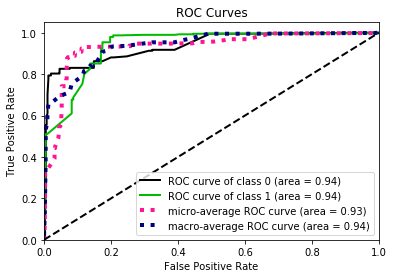

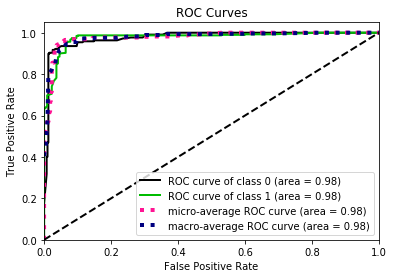

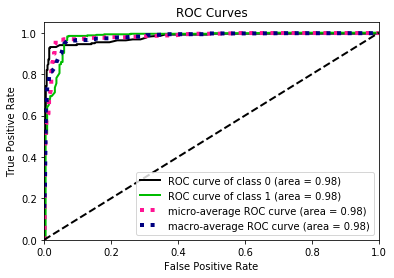

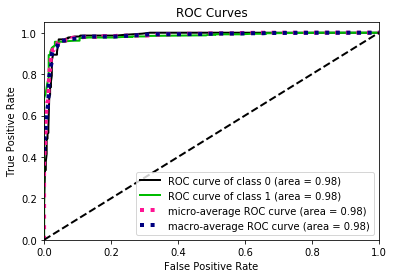

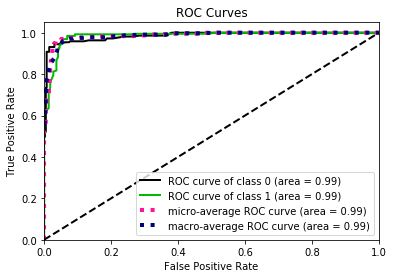

In [27]:

accuracy_sum=0

precision_micro_sum=0
precision_macro_sum=0
precision_weighted_sum=0

recall_micro_sum=0
recall_macro_sum=0
recall_weighted_sum=0

f1_micro_sum=0
f1_macro_sum=0
f1_weighted_sum=0

clf= ensemble.GradientBoostingClassifier()
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
#Accuracy calculation    
    accuracy=metrics.accuracy_score(y_test, y_pred)
    accuracy_sum=accuracy_sum+accuracy    
#Precision calculation
    precision_micro=metrics.precision_score(y_test,y_pred, average='micro')
    print(precision_micro)
    precision_micro_sum=precision_micro_sum+precision_micro
    precision_macro=metrics.precision_score(y_test,y_pred, average='macro')
    precision_macro_sum=precision_macro_sum+precision_macro
    precision_weighted=metrics.precision_score(y_test,y_pred, average='weighted')
    precision_weighted_sum=precision_weighted_sum+precision_weighted
#recall calculation    
    recall_micro= metrics.recall_score(y_test, y_pred, average='micro')
    recall_micro_sum= recall_micro_sum+recall_micro
    recall_macro= metrics.recall_score(y_test, y_pred, average='macro')
    recall_macro_sum= recall_macro_sum+recall_macro    
    recall_weighted= metrics.recall_score(y_test, y_pred, average='weighted')
    recall_weighted_sum= recall_weighted_sum+recall_weighted    
#f1 calculation
    f1_micro=f1_score(y_test, y_pred, average='micro')
    f1_micro_sum=f1_micro_sum+f1_micro
    f1_macro=f1_score(y_test, y_pred, average='macro')
    f1_macro_sum=f1_macro_sum+f1_macro
    f1_weighted=f1_score(y_test, y_pred, average='weighted')
    f1_weighted_sum=f1_weighted_sum+f1_weighted
#ROC curve    
    y_pred= clf.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, y_pred)

        
    
#accuracy average    
accuracy_average= accuracy_sum/5
#precision average
precision_micro_average=precision_micro_sum/5
precision_macro_average=precision_macro_sum/5
precision_weighted_average=precision_weighted_sum/5
#recall average
recall_micro_average=recall_micro_sum/5
recall_macro_average=recall_macro_sum/5
recall_weighted_average=recall_weighted_sum/5
#f1 average
f1_micro_average=f1_micro_sum/5
f1_macro_average=f1_macro_sum/5
f1_weighted_average=f1_weighted_sum/5

print('Gradient Boosting Classifier: ')
print('Accuracy score is :                ',accuracy_average*100)
print("")
print('Micro precision score is:          ',precision_micro_average*100)
print('Macro precision score is:          ',precision_macro_average*100)
print('Weighted precision score is:       ',precision_weighted_average*100)
print("")
print('Micro Recall score is:             ',recall_micro_average*100)
print('Macro Recall score is:             ',recall_macro_average*100)
print('Weighted Recall score is:          ',recall_weighted_average*100)
print("")
print('Micro f1 score is:                 ', f1_micro_average*100)
print('Macro f1 score is:                 ', f1_macro_average*100)
print('Weighted f1 score is:              ', f1_weighted_average*100)
#accuracy_average= accuracy_sum/5    
#print(accuracy_average*100)  
#df.iloc[train_index]

## Authority

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
0.9161184210526315
0.9522240527182867
0.9554455445544554
0.9570957095709571
0.9455445544554455
Decision Tree Classifier: 
Accuracy score is :                 94.52856564703552

Micro precision score is:           94.52856564703552
Macro precision score is:           94.21009615750422
Weighted precision score is:        94.57351927073516

Micro Recall score is:              94.52856564703552
Macro Recall score is:              93.90883096442994
Weighted Recall score is:           94.52856564703552

Micro f1 score is:                  94.52856564703552
Macro f1 score is:                  94.00734469744432
Weighted f1 score is:               94.50726492013409


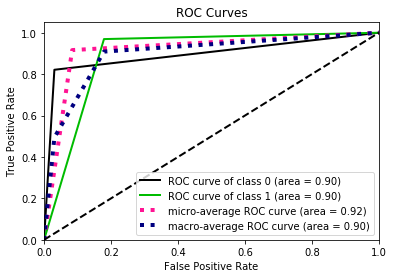

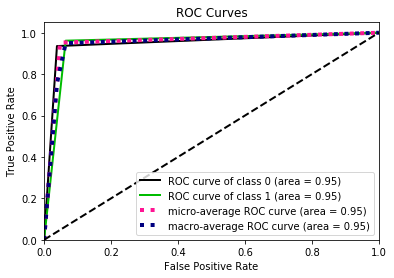

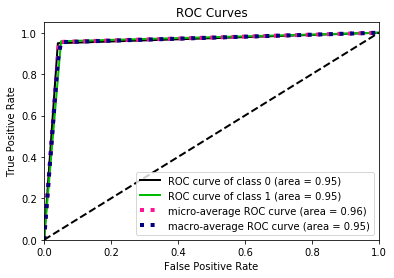

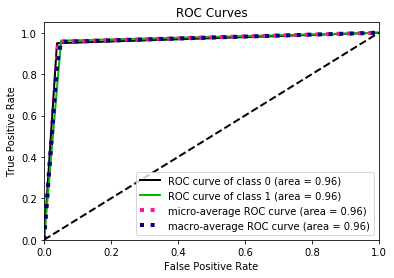

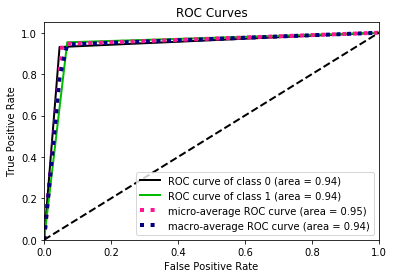

In [28]:
accuracy_sum=0

precision_micro_sum=0
precision_macro_sum=0
precision_weighted_sum=0

recall_micro_sum=0
recall_macro_sum=0
recall_weighted_sum=0

f1_micro_sum=0
f1_macro_sum=0
f1_weighted_sum=0

clf= DecisionTreeClassifier(random_state=0)
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
#Accuracy calculation    
    accuracy=metrics.accuracy_score(y_test, y_pred)
    accuracy_sum=accuracy_sum+accuracy    
#Precision calculation
    precision_micro=metrics.precision_score(y_test,y_pred, average='micro')
    print(precision_micro)
    precision_micro_sum=precision_micro_sum+precision_micro
    precision_macro=metrics.precision_score(y_test,y_pred, average='macro')
    precision_macro_sum=precision_macro_sum+precision_macro
    precision_weighted=metrics.precision_score(y_test,y_pred, average='weighted')
    precision_weighted_sum=precision_weighted_sum+precision_weighted
#recall calculation    
    recall_micro= metrics.recall_score(y_test, y_pred, average='micro')
    recall_micro_sum= recall_micro_sum+recall_micro
    recall_macro= metrics.recall_score(y_test, y_pred, average='macro')
    recall_macro_sum= recall_macro_sum+recall_macro    
    recall_weighted= metrics.recall_score(y_test, y_pred, average='weighted')
    recall_weighted_sum= recall_weighted_sum+recall_weighted    
#f1 calculation
    f1_micro=f1_score(y_test, y_pred, average='micro')
    f1_micro_sum=f1_micro_sum+f1_micro
    f1_macro=f1_score(y_test, y_pred, average='macro')
    f1_macro_sum=f1_macro_sum+f1_macro
    f1_weighted=f1_score(y_test, y_pred, average='weighted')
    f1_weighted_sum=f1_weighted_sum+f1_weighted
#ROC curve    
    y_pred= clf.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, y_pred)

        
    
#accuracy average    
accuracy_average= accuracy_sum/5
#precision average
precision_micro_average=precision_micro_sum/5
precision_macro_average=precision_macro_sum/5
precision_weighted_average=precision_weighted_sum/5
#recall average
recall_micro_average=recall_micro_sum/5
recall_macro_average=recall_macro_sum/5
recall_weighted_average=recall_weighted_sum/5
#f1 average
f1_micro_average=f1_micro_sum/5
f1_macro_average=f1_macro_sum/5
f1_weighted_average=f1_weighted_sum/5

print('Decision Tree Classifier: ')
print('Accuracy score is :                ',accuracy_average*100)
print("")
print('Micro precision score is:          ',precision_micro_average*100)
print('Macro precision score is:          ',precision_macro_average*100)
print('Weighted precision score is:       ',precision_weighted_average*100)
print("")
print('Micro Recall score is:             ',recall_micro_average*100)
print('Macro Recall score is:             ',recall_macro_average*100)
print('Weighted Recall score is:          ',recall_weighted_average*100)
print("")
print('Micro f1 score is:                 ', f1_micro_average*100)
print('Macro f1 score is:                 ', f1_macro_average*100)
print('Weighted f1 score is:              ', f1_weighted_average*100)
#accuracy_average= accuracy_sum/5    
#print(accuracy_average*100)  
#df.iloc[train_index]